In [1]:
!pip install pandas matplotlib seaborn



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

# Load the movies and ratings datasets
movies = pd.read_csv("movies.csv")  # Replace with your file path
ratings = pd.read_csv("ratings.csv")  # Replace with your file path

# Display the first few rows of each dataset
movies.head(), ratings.head()


(   movieId                               title  \
 0        1                    Toy Story (1995)   
 1        2                      Jumanji (1995)   
 2        3             Grumpier Old Men (1995)   
 3        4            Waiting to Exhale (1995)   
 4        5  Father of the Bride Part II (1995)   
 
                                         genres  
 0  Adventure|Animation|Children|Comedy|Fantasy  
 1                   Adventure|Children|Fantasy  
 2                               Comedy|Romance  
 3                         Comedy|Drama|Romance  
 4                                       Comedy  ,
    userId  movieId  rating   timestamp
 0       1       16     4.0  1217897793
 1       1       24     1.5  1217895807
 2       1       32     4.0  1217896246
 3       1       47     4.0  1217896556
 4       1       50     4.0  1217896523)

In [3]:
# Merge the datasets on 'movieId'
movie_data = pd.merge(ratings, movies, on='movieId')

# Calculate the average rating for each movie
avg_ratings = movie_data.groupby('title')['rating'].mean().sort_values(ascending=False)

# Display the top 10 movies by average rating
avg_ratings.head(10)


title
Saddest Music in the World, The (2003)                          5.0
Interstate 60 (2002)                                            5.0
Gunfighter, The (1950)                                          5.0
Heima (2007)                                                    5.0
Limelight (1952)                                                5.0
Plague Dogs, The (1982)                                         5.0
Love Me If You Dare (Jeux d'enfants) (2003)                     5.0
Syrup (2013)                                                    5.0
Interstella 5555: The 5tory of the 5ecret 5tar 5ystem (2003)    5.0
Symbol (Shinboru) (2009)                                        5.0
Name: rating, dtype: float64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20124\1564213257.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


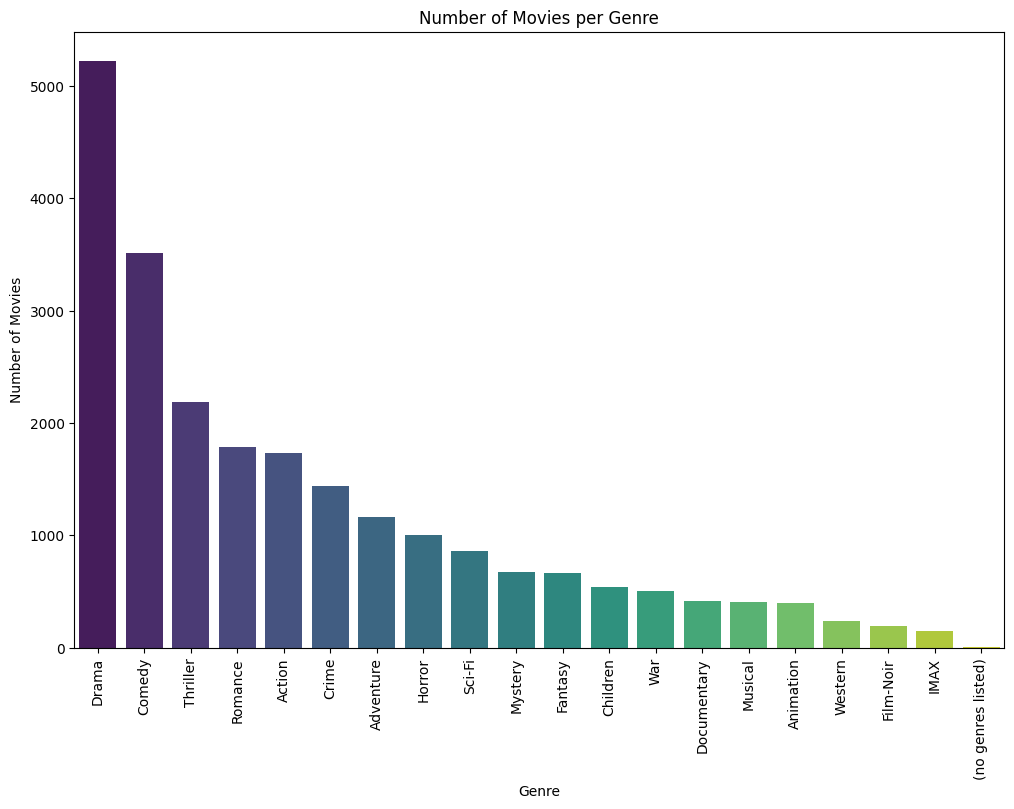

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Split the 'genres' column into a list
movies['genres'] = movies['genres'].str.split('|')

# Create a list of all genres
all_genres = [genre for sublist in movies['genres'] for genre in sublist]

# Convert the list into a DataFrame
genre_df = pd.DataFrame(all_genres, columns=['genre'])

# Count the occurrences of each genre
genre_counts = genre_df['genre'].value_counts()

# Plot the genre distribution
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()


In [5]:
# Define the genre of interest
genre_of_interest = 'Comedy'  # Change this to any genre you're interested in

# Filter movies by the specified genre
genre_movies = movies[movies['genres'].apply(lambda x: genre_of_interest in x)]

# Merge with ratings data
genre_movie_data = pd.merge(ratings, genre_movies[['movieId', 'title']], on='movieId')

# Calculate the average rating for each movie in the specified genre
genre_avg_ratings = genre_movie_data.groupby('title')['rating'].mean().sort_values(ascending=False)

# Display the top 10 movies in the specified genre
genre_avg_ratings.head(10)


title
Heat (1972)                                                      5.0
Austenland (2013)                                                5.0
Gentlemen of Fortune (Dzhentlmeny udachi) (1972)                 5.0
Cold Fever (Á köldum klaka) (1995)                               5.0
Star Wreck: In the Pirkinning (2005)                             5.0
Dear Diary (Caro Diario) (1994)                                  5.0
Sleepwalk with Me (2012)                                         5.0
Women on the 6th Floor, The (Les Femmes du 6ème Étage) (2010)    5.0
Three Ages (1923)                                                5.0
Ricky Gervais: Out of England - The Stand-Up Special (2008)      5.0
Name: rating, dtype: float64